# Install packages

- pyreadstat is required to read .SAV file

In [25]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


# Import packages

- pandas is a fundamental and powerful package for data analysis and manipulation.
- pyreadstat for reading .sav file
- numpy is the fundamental package for scientific computing with Python.
- matplotlib is a library to plot graphs in Python.
- seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [66]:
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px

#Setting seed for keeping all the random function calls consistent.
np.random.seed(100)  

#allow tab function
%config Completer.use_jedi = False

# 1. Read SECOM dataset

In [68]:
raw_data = pd.read_spss("../data/secom_mod.sav")
raw_data = raw_data.set_index('ID')
raw_data['class'] = raw_data['class'].replace({0: "Pass", 1: "Fail"})

# 2. Data Understanding

#### 2.1 Exploring data (Data Quality and Data Quantity)

In [53]:
## have a look at the first five rows of dataset
raw_data.head()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1.0,Pass,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
2.0,Pass,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
3.0,Fail,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
4.0,Pass,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
5.0,Pass,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [29]:
## Overview information about SECOM dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1567 entries, 1.0 to 1567.0
Columns: 592 entries, class to feature590
dtypes: float64(591), object(1)
memory usage: 7.1+ MB


In [30]:
## Shape of data set including 1567 rows and 593 columns
raw_data.shape

(1567, 592)

In [31]:
## Example of Statistical numeric values in 8 rows
raw_data.describe()

,class,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
count,1567.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,0.060625,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,0.238718,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,0.000000,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,0.000000,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,0.000000,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,0.000000,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,1.000000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [32]:
#Check duplicated observation
raw_data.duplicated(subset=None, keep='first').sum()

0

In [33]:
# Types of data in the dataset
raw_data.dtypes

class         float64
timestamp      object
feature001    float64
feature002    float64
feature003    float64
               ...   
feature586    float64
feature587    float64
feature588    float64
feature589    float64
feature590    float64
Length: 592, dtype: object

In [34]:
# Number of pass and fail values
raw_data['class'].value_counts()

0.0    1472
1.0      95
Name: class, dtype: int64

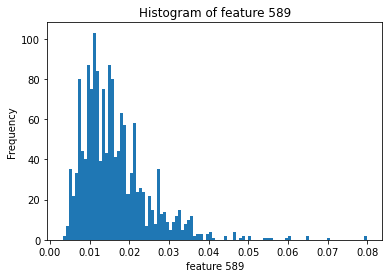

In [35]:
#Example of histogram of feature 589
plt.hist(raw_data.iloc[:,589], bins = 100)
plt.xlabel('feature 589')
plt.ylabel('Frequency')
plt.title('Histogram of feature 589')
plt.show()

#### 2.2 Missing Value Analysis

In [37]:
#Drop other features (class, timestamp)
feature_data = raw_data.drop(['class', 'timestamp'], axis=1)

In [38]:
# Checking NA in feature 160
raw_data['feature160'].isna().sum()

2

In [39]:
# Total number of NA values in the dataset
raw_data.isna().sum().sum()

41951

In [40]:
# Showing top 10 features containing missing values
feature_na = feature_data.isnull().sum().sort_values(ascending = False).head(10)

print(feature_na)

feature158    1429
feature293    1429
feature294    1429
feature159    1429
feature493    1341
feature359    1341
feature086    1341
feature221    1341
feature247    1018
feature110    1018
dtype: int64


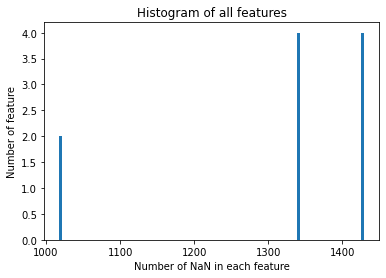

In [74]:
# Plot top 10 features containing missing values
plt.hist(feature_na, bins= 100)
plt.xlabel('Number of NaN in each feature')
plt.ylabel('Number of feature')
plt.title('Histogram of all features')
plt.show()

In [ ]:
#Show number of missing values of 100 features in ascending order
feature_na = feature_data.isnull().sum().sort_values(ascending = True).head(100)

In [ ]:
feature_na[feature_na <= 100]

In [ ]:
#Check is there any missing values in all features 
feature_data.isnull().any().any()

In [ ]:
#Check missing values in each row 
raw_data.isnull().sum(axis = 1).sort_values(ascending = True).head(10)

In [ ]:
raw_data.isnull().sum(axis = 0) # each column

In [ ]:
# % of missing values and zero values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Missing Values'})
        mz_table['Total Zero&Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero&Missing Values'] = 100 * mz_table['Total Zero&Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Missing Values', ascending=False).round(1)
        print ("The SECOM dataset has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.") 
        return mz_table

missing_zero_values_table(raw_data)

In [106]:
#1 count features containing more than 55% missing values 
mis_per = 100 * feature_data.isnull().sum() / len(feature_data)
miss50 = mis_per.sort_values(ascending = False)
miss50[miss50 > 55].count()

24

In [72]:
#1) To find number of feature containing missing values 
mis = feature_data.isnull().sum()
mis[mis >= 1]

feature001     6
feature002     7
feature003    14
feature004    14
feature005    14
              ..
feature586     1
feature587     1
feature588     1
feature589     1
feature590     1
Length: 538, dtype: int64

In [73]:
# 100% constant values (0% variance)
len(raw_data.columns[raw_data.nunique() == 1])

116

#### 2.3 Outlier Analysis

In [ ]:
Q1 = feature_data.quantile(0.25)
Q3 = feature_data.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
out_sum =((feature_data < (Q1 - 1.5 * IQR)) | (feature_data > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False)
out_sum

In [ ]:
out_sum.hist()

In [ ]:
out_sum.sum()

In [ ]:
sns.boxplot(x= feature_data.iloc[:,4])  
plt.title('Boxplot')
plt.show()

In [ ]:
sns.boxplot(x= feature_data.iloc[:,312])  
plt.title('Boxplot')
plt.show()

In [ ]:
sns.boxplot(x= feature_data.iloc[:,335])  
plt.title('Boxplot')
plt.show()

In [ ]:
sns.boxplot(x= feature_data.iloc[:,31])  
plt.title('Boxplot')
plt.show()

In [ ]:
out_sum[out_sum == 0]

In [ ]:
out_sum[out_sum != 0]

In [ ]:
out_sum.feature125

In [ ]:
plt.hist(feature_data.iloc[:,4], bins = 20)
plt.xlabel('feature005')
plt.ylabel('Frequency')
plt.title('Histogram of feature 5')
plt.show()

In [ ]:
plt.hist(feature_data.iloc[:,31], bins =40)
plt.xlabel('feature032')
plt.ylabel('Frequency')
plt.title('Histogram of feature 32')
plt.show()

In [ ]:
plt.hist(feature_data.iloc[:,335], bins =200)
plt.xlabel('feature336')
plt.ylabel('Frequency')
plt.title('Histogram of feature 336')
plt.show()

In [ ]:
plt.hist(feature_data.iloc[:,312], bins =50)
plt.xlabel('feature313')
plt.ylabel('Frequency')
plt.title('Histogram of feature 313')
plt.show()

# 3. Data Splitting

Data splitting using stratified random sampling method in order to maintain the target feature ratio(Pass/Fail)  in train and test datasets with respect to the original dataset.

In [54]:
#check the ratio between pass(0) and fail(1)
raw_data['class'].value_counts()/len(raw_data)*100

Pass    93.93746
Fail     6.06254
Name: class, dtype: float64

In [194]:
# x is independent variable, y is dependent variable or target feature
X = raw_data.drop(['class', 'timestamp'], axis=1)
y = raw_data['class']

In [195]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, shuffle=True, stratify = y)

In [196]:
#to check if the test and train data also has the same pass/fail ratio

fig = px.pie(
    y_train.value_counts(),
    values='class',
    names=["Pass", "Fail"],
    title="Class Distribution of Train data",
    width=500
)

fig.show()



import plotly.express as px
fig = px.pie(
    y_test.value_counts(),
    values='class',
    names=["Pass", "Fail"],
    title="Class Distribution of Test data",
    width=500
)

fig.show()

# 4) Data Cleaning 

### 4.1) Dimensionality Reduction

4.1.1) Removing constants (std = 0)

In [197]:
#Before removing constants
X_train.shape

(1253, 590)

In [198]:
#number of features containing constants
len(X_train.columns[X_train.nunique() == 1])

116

In [199]:
#Drop the above features
X_train.drop(list(X_train[X_train.columns[X_train.nunique() == 1]].columns), axis = 1, inplace = True)

/opt/anaconda3/envs/SECOM/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [200]:
#After removing constant, it remains 474 columns 
X_train.shape

(1253, 474)

#### 4.1.2) Removing features containing 55% or more missing values

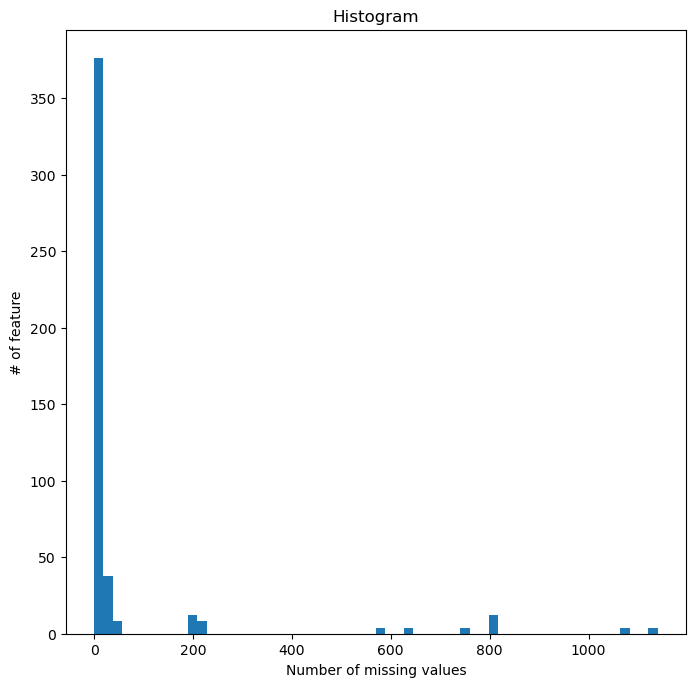

In [201]:
# Plot a histogram

fig, ax = plt.subplots()
ax.hist(feature_na_train, bins = 60)
ax.set_xlabel("Number of missing values")
ax.set_ylabel("# of feature")
ax.set_title('Histogram')
plt.show()

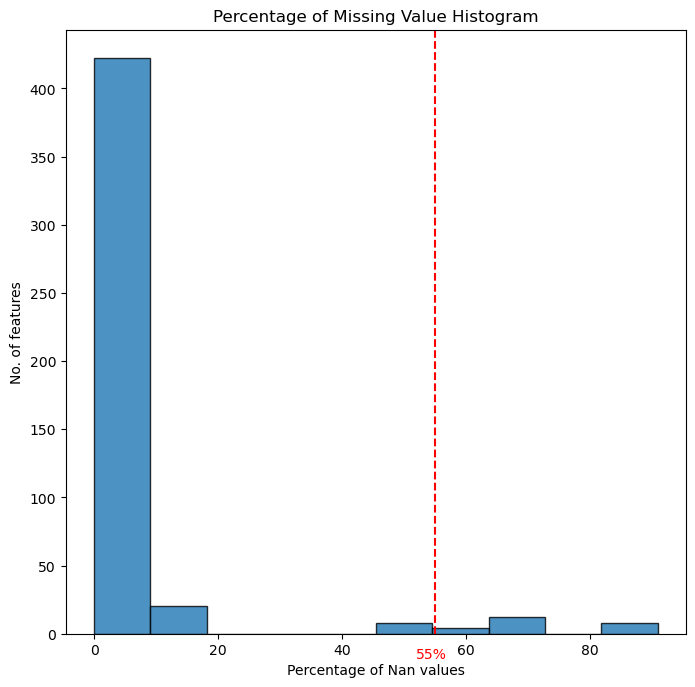

In [202]:
# Percentage Missing Value histogram
nan_perc = pd.DataFrame(round((X_train.isnull().sum() * 100/ len(X_train)),2))
nan_perc = nan_perc.reset_index()
nan_perc = nan_perc.rename({'index': 'feature', 0: 'percentage'}, axis=1)

%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})
n,bins,patch = plt.hist(nan_perc['percentage'],bins=10, alpha=0.8, label='Value', edgecolor='black', linewidth=1)
plt.gca().set(title='Percentage of Missing Value Histogram', ylabel='No. of features', xlabel='Percentage of Nan values');

# add a vertical red line at 55% of missing values
plt.axvline(x=55, color='red', linestyle= '--')
plt.text(52,-18,'55%',fontsize=10, color="red")
plt.show()

In [203]:
## Function to remove features containing more than 55% missing values

#1 start from the first column(begin with column 0) and count the NA of that column.
#2 Use While loop to iterate until the last column.
#3 If the percentage of NA is higher than 55%, we delete the column.
#4 Otherwise i plus 1 to the next column. 

def remove_na(dataframe,threshold = 0.55):   # threshold = 0.55 as default value
    i = 0
    while i < len(dataframe.columns):    
        if dataframe.iloc[:,i].isnull().sum()/len(dataframe) > threshold:
            dataframe.drop(dataframe.columns[[i]], axis = 1,inplace = True)
        else:
            i += 1

In [204]:
# Implement function remove_na on train dataset 
remove_na(X_train)

In [205]:
# check the dimension of train dataset after deletion of variables over 55% NA. 450 columns remain.
X_train.shape

(1253, 450)

#### 4.1.3) Removing features with low variance